# **Trabajo Práctico 1**
## Clasificador de Recomendaciones Recreativas utilizando Procesamiento de Lenguaje Natural (NLP)

### Integrantes:
* Longo, Gonzalo
* Yañez, Mirian

# **Enunciado:**

**Contexto:**  
Una persona dentro de un mes, se tomará 15 días de vacaciones en la playa. Sin embargo, se estima que durante al menos cuatro de esos días habrá lluvias, lo que podría limitar las actividades al aire libre. Para esos días de mal clima, se propone una solución que facilite la recreación en función del estado de ánimo del día.

**Objetivo:**  
Desarrollar un programa de Procesamiento de Lenguaje Natural que, según el estado de ánimo del usuario, recomiende entre ver una película, jugar un juego de mesa o leer un libro (o varias opciones para cada caso). Para ello, deberá construir un clasificador que categorice el estado de ánimo del usuario. Luego sugerir el conjunto de recomendaciones basada en una frase de preferencia ingresada por el usuario.

**Pasos para la construcción del proyecto:**  

**1- Clasificación del Estado de Ánimo:**  
Utilice los conocimientos aprendidos en la Unidad 3 para desarrollar un clasificador a partir de un prompt con el que determine el estado de ánimo del usuario, el cual deberá categorizarse por ejemplo: "Alegre", "Melancólico" o "Ni fu ni fa".

**2- Ingreso de Preferencias:**  
Una vez determinado el estado de ánimo, el usuario deberá ingresar una frase que describa la temática que le gustaría explorar. Por ejemplo: "una historia de amor en la selva".

**3- Búsqueda de Opciones:**  
El programa deberá comparar la frase ingresada por el usuario con diversas estructuras de texto provenientes de diferentes fuentes de datos utilizando los métodos aprendidos en clase.

Disponga de los siguientes datasets:
* **bgg_database.csv:** Base de datos de juegos de mesa.
* **IMDB-Movie-Data.csv:** Base de datos de películas.
* **Libros del Proyecto Gutenberg:** Realice web scraping para conformar un dataset con información sobre los 1000 libros más populares del Proyecto Gutenberg. El enlace a utilizar es el siguiente: https://www.gutenberg.org/browse/scores/top1000.php#books-last1.

**Recomendaciones:**  
Con base en el estado de ánimo del usuario y la frase ingresada, el programa deberá ofrecer recomendaciones pertinentes entre películas, juegos de mesa o libros. Utilice las herramientas de NLP aprendidas en las tres primeras unidades para lograr resultados coherentes y personalizados.

**Requerimientos mínimos:**  
* Utilice clasificadores para determinar el estado de ánimo (por ejemplo, métodos de clasificación supervisada).
* Aplique técnicas de embeddings y comparación de similitud semántica para encontrar las mejores coincidencias en los datasets.
* Utilice la potencia de reconocimiento de entidades nombradas, (NER, modelo Gliner) con el objetivo de obtener los mejores resultados buscados.

**Entrega:**

* Se debe entregar un informe donde se documente cómo se implementa cada parte del programa, incluyendo explicaciones de cómo funcionan los algoritmos utilizados.

* Realice pruebas con diferentes ejemplos para mostrar la efectividad del clasificador y del sistema de recomendación.

* El código debe estar bien comentado y seguir buenas prácticas de programación. Debe utilizar entregar el o los colab utilizados en formato de notebook.

* Se debe entregar el dataset generado con el web scraping.



**Nota:**   
Las fuentes de datos se encuentran en inglés, la aplicación debe comunicarse con el usuario en español.

**Opcional:**  
 Puede presentar una aplicación para el programa desarrollado, utilizando Google Colab con una interfaz sencilla basada en widgets como los proporcionados por la librería ip widgets.



# **Código:**

## **🧭 Pasos a seguir:**
1.   Librerias necesarias
2.   Web scraping para obtener dataset de libros
3.   Datasets necesarios para la aplicación
4.   Clasificador de estado de animo
5.   Recomendaciones
6.   App

## **Instalamos las dependencias** 📚 📚

Utilizaremos las siguientes librerias:  

  * **gdown:** Permite descargar archivos de Google Drive fácilmente.  
  * **beautifulsoup4:** Herramienta para analizar y extraer datos de documentos HTML y XML.  
  * **lxml:** Biblioteca de procesamiento de XML y HTML con rendimiento superior.  
  * **faiss-cpu:** Biblioteca para la búsqueda y agrupación de vectores en grandes conjuntos de datos.  
  * **sentence-transformers:** Proporciona modelos para transformar oraciones en vectores, útil para comparación de textos.  
  * **mtranslate:** Permite traducir texto entre diferentes idiomas usando la API de Google Translate.  
  * **ipywidgets:** Herramientas para crear widgets interactivos en Jupyter notebooks.  
  * **imbalanced-learn:** Biblioteca para el manejo de datos desbalanceados en aprendizaje automático, proporcionando técnicas para balancear conjuntos de datos.

In [ ]:
!pip install gdown beautifulsoup4 lxml \
    faiss-cpu sentence-transformers \
     mtranslate ipywidgets imbalanced-learn


## **Descargamos los datasets** 🔽 📂

**NOTA:** si se ejecuta la siguiente celda no hace falta ejecutar las 3 celdas siguientes, ya que descargamos el dataset generado por las mismas para ahorrar tiempo

In [ ]:
import gdown

### Descargamos los datasets

In [ ]:
url = 'https://drive.google.com/drive/folders/1u-q-c8m-J6IGvfm5K3XvZCHhGIvvFHeh?usp=sharing'
gdown.download_folder(url, output='data', quiet=False, use_cookies=False)

Retrieving folder contents


Processing file 1ocXLaeKSz9-_AC0aJNMSqES2BJrKYCxB bgg_database.csv
Processing file 1Q8240tX7DoKUVMt7sEMWxxabD1wphTxH books.csv
Processing file 1gO1GvZQwxZWrd2OMcxTSwTho42FJWjeX IMDB-Movie-Data.csv


Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1ocXLaeKSz9-_AC0aJNMSqES2BJrKYCxB
To: /content/data/bgg_database.csv
100%|██████████| 1.83M/1.83M [00:00<00:00, 122MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Q8240tX7DoKUVMt7sEMWxxabD1wphTxH
To: /content/data/books.csv
100%|██████████| 1.11M/1.11M [00:00<00:00, 52.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1gO1GvZQwxZWrd2OMcxTSwTho42FJWjeX
To: /content/data/IMDB-Movie-Data.csv
100%|██████████| 309k/309k [00:00<00:00, 117MB/s]
Download completed


['data/bgg_database.csv', 'data/books.csv', 'data/IMDB-Movie-Data.csv']

## **Scrapper De Libros** ⛏ ⛏

In [ ]:
import requests
from bs4 import BeautifulSoup
import csv
import ssl
import concurrent.futures
import time
import pandas as pd

In [ ]:
# Configuramos el contexto HTTPS para que no verifique los certificados SSL/TLS
ssl._create_default_https_context = ssl._create_unverified_context

In [ ]:
class ScraperBooks:
  """
  Clase para realizar scraping de libros desde una página web.

  Esta clase permite extraer títulos y detalles de libros listados en una URL proporcionada,
  almacenando los datos en un archivo CSV.

  Atributos:
      url (str): URL de la página de libros de la que se extraerán los datos.
  """

  def __init__(self, url):
    """
    Inicializa una instancia de la clase con la URL especificada.

    Args:
        url (str): La URL de la página web que será utilizada para extraer información.
    """
    self.url = url

  def get_books(self):
    """
    Obtiene una lista de URLs de libros a partir de la pagina dada por
    la url de la clase

    Args:
        None

    Returns:
        -list: Lista de strings, donde cada string es la URL completa de un libro
        de la pagina
    """
    response = requests.get(self.url)
    soup = BeautifulSoup(response.content, 'html.parser')
    div = soup.find_all('div', class_='page_content')[0]
    ol = div.find('ol')
    lis = ol.find_all('li')
    return ['https://www.gutenberg.org' + li.find('a')['href'] for li in lis]

  def get_book_details(self, book_url):
    """Realiza scraping para obtener detalles de un libro dado su URL.

    Args:
        -book_url (str): URL del libro del cual se extraerán los detalles.

    Returns:
        -dict: Un diccionario que contiene las claves 'Author', 'Title', 'Summary' y 'Link'.
    """
    print(book_url)
    response = requests.get(book_url)
    soup = BeautifulSoup(response.content, 'html.parser')
    table = soup.find('table', class_='bibrec')
    details = {
        tr.th.get_text(strip=True):tr.td.get_text(strip=True)
        for tr in table.find_all('tr')
        if tr.th and tr.td and tr.th.get_text(strip=True) in {'Author', 'Title', 'Summary'}
    }
    details['Link'] = book_url
    return details

  def save_to_csv(self, data, filename='data/books.csv'):
    """
    Guarda los datos proporcionados en un archivo CSV.

    Args:
        -data (list of dict): Lista de diccionarios donde cada diccionario representa
        un libro con claves como 'Title', 'Author', 'Summary', y 'Link'.
        -filename (str): Nombre del archivo CSV de destino. Por defecto es 'data/books.csv'.

    Returns:
        None
    """
    with open(filename, mode='w', newline='', encoding='utf-8') as file:
      writer = csv.DictWriter(file, fieldnames=['Title', 'Author', 'Summary', 'Link'])
      writer.writeheader()
      writer.writerows(data)

  def run(self):
    """
    Ejecuta el proceso de extracción y almacenamiento de datos de libros.
    Utilizando los metodos anteriores obtiene la lista de libros, extrae
    los detalles de cada uno de ellos utilizando múltiples hilos para mejorar
    la eficiencia, guarda los detalles en un archivo CSV y muestra la cantidad
    de libros procesados junto con el tiempo total de ejecución.

    Args:
        None

    Returns:
        None
    """
    start_time = time.time()
    books = self.get_books()
    with concurrent.futures.ThreadPoolExecutor() as executor:
        books_details = list(executor.map(self.get_book_details, books))
    self.save_to_csv(books_details)
    print(f"{len(books_details)} libros guardados en 'data/books.csv'.")
    elapsed_time = time.time() - start_time
    print(f"Tiempo total: {elapsed_time:.2f} segundos")

### Creamos un objeto de tipo ScraperBooks y ejecutamos el scraper
 💽

In [ ]:
scraper = ScraperBooks("https://www.gutenberg.org/browse/scores/top1000.php#books-last1")
scraper.run()

https://www.gutenberg.org/ebooks/84
https://www.gutenberg.org/ebooks/1342
https://www.gutenberg.org/ebooks/2701
https://www.gutenberg.org/ebooks/1513
https://www.gutenberg.org/ebooks/25558
https://www.gutenberg.org/ebooks/25344
https://www.gutenberg.org/ebooks/2542
https://www.gutenberg.org/ebooks/11
https://www.gutenberg.org/ebooks/100
https://www.gutenberg.org/ebooks/2641https://www.gutenberg.org/ebooks/145

https://www.gutenberg.org/ebooks/46
https://www.gutenberg.org/ebooks/37106
https://www.gutenberg.org/ebooks/844
https://www.gutenberg.org/ebooks/64317
https://www.gutenberg.org/ebooks/67979
https://www.gutenberg.org/ebooks/16389
https://www.gutenberg.org/ebooks/174
https://www.gutenberg.org/ebooks/6593
https://www.gutenberg.org/ebooks/6761
https://www.gutenberg.org/ebooks/394
https://www.gutenberg.org/ebooks/5200https://www.gutenberg.org/ebooks/2160

https://www.gutenberg.org/ebooks/4085
https://www.gutenberg.org/ebooks/345
https://www.gutenberg.org/ebooks/43
https://www.gutenber

## **Datasets** 💽 💽 💽
Visualizamos la información de los datasets

In [ ]:
import pandas as pd

# Leemos y almacenamos los datasets

In [ ]:
peliculas = pd.read_csv('data/IMDB-Movie-Data.csv')
juegos = pd.read_csv('data/bgg_database.csv')
libros = pd.read_csv('data/books.csv')

### **Peliculas:**

In [ ]:
peliculas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  1000 non-null   float64
 11  Metascore           1000 non-null   int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 93.9+ KB


### **Juegos de mesa:**

In [ ]:
juegos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rank              1000 non-null   int64  
 1   game_name         1000 non-null   object 
 2   game_href         1000 non-null   object 
 3   geek_rating       1000 non-null   float64
 4   avg_rating        1000 non-null   float64
 5   num_voters        1000 non-null   float64
 6   description       1000 non-null   object 
 7   yearpublished     1000 non-null   int64  
 8   minplayers        1000 non-null   int64  
 9   maxplayers        1000 non-null   int64  
 10  minplaytime       1000 non-null   int64  
 11  maxplaytime       1000 non-null   int64  
 12  minage            1000 non-null   int64  
 13  avgweight         1000 non-null   float64
 14  best_num_players  1000 non-null   object 
 15  designers         1000 non-null   object 
 16  mechanics         1000 non-null   object 
 

### **Libros:**

In [ ]:
libros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Title    1000 non-null   object
 1   Author   943 non-null    object
 2   Summary  938 non-null    object
 3   Link     1000 non-null   object
dtypes: object(4)
memory usage: 31.4+ KB


### **Conclusión:**  
Cada dataset tiene 1000 datos, por lo tanto, al ser 3 datasets, tenemos **3000 datos** en total para nuestro proposito.

### **📈 Progresos :**
1.   Librerias necesarias para la aplicacion ✅
2.   Web scraping para obtener dataset de libros ✅
3.   Datasets necesarios para la aplicación ✅
4.   Clasificador de estado de animo
5.   Recomendaciones
6.   App

## **Clasificador** 😄😐😢

In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from transformers import pipeline
from mtranslate import translate
import numpy as np
import matplotlib.pyplot as plt
import warnings
import pandas as pd
from sentence_transformers import SentenceTransformer
from transformers import pipeline
import random
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score, classification_report, log_loss
from imblearn.over_sampling import RandomOverSampler
import joblib

### Creamos dataset sintetico de frases con 3 emociones distintas

In [ ]:
emociones = ['Alegre', 'Ni fu ni fa', 'Melancólico']

sintesis_textos_alegres = [
    "Estoy muy feliz hoy", "Fue un día espectacular", "Todo está perfecto", "Me siento muy contento",
    "La vida es maravillosa", "Qué bien me siento", "Todo está saliendo de maravilla", "Estoy muy emocionado",
    "Es un gran día", "Hoy todo salió perfecto", "Estoy lleno de energía", "Estoy satisfecho con todo",
    "Todo ha sido genial", "Qué maravilloso día", "Me encanta cómo salió todo", "Hoy me siento afortunado",
    "Estoy agradecido por este día", "Ha sido un día increíble", "Todo es fabuloso", "Estoy encantado con todo",
    "La felicidad me rodea", "Estoy muy alegre", "Estoy muy motivado", "Todo salió mejor de lo esperado",
    "Me siento en la cima del mundo", "Es un día espléndido", "Hoy es un día muy especial", "Todo es perfecto",
    "Estoy celebrando la vida", "Qué día tan increíble", "La felicidad me embarga", "Estoy tan contento",
    "Es un día lleno de logros", "Estoy muy inspirado", "Este es el mejor día", "Hoy es un día grandioso",
    "Estoy muy positivo", "Estoy viviendo un sueño", "Estoy eufórico", "Qué emoción siento hoy",
    "Este día no podría ser mejor", "Estoy muy orgulloso", "Todo está a mi favor", "Estoy extasiado",
    "Estoy en paz con todo", "Este día está lleno de cosas buenas", "Estoy con mucho entusiasmo",
    "Hoy es un gran momento", "Estoy muy optimista", "Todo está saliendo bien", "Estoy muy satisfecho",
    "La vida es bella", "Estoy lleno de felicidad", "Todo está en armonía", "Hoy es un día mágico",
    "Me siento pleno", "Estoy en el mejor momento", "La alegría me invade", "Todo es maravilloso",
    "Estoy disfrutando cada momento", "Este día es perfecto", "Estoy muy agradecido", "Todo es color de rosa",
    "Estoy lleno de esperanzas", "Me siento increíblemente bien", "Es un día radiante", "Estoy lleno de amor",
    "Hoy es especial", "Me siento muy afortunado", "Estoy celebrando mis logros", "Todo está saliendo perfecto",
    "Estoy lleno de energía positiva", "Estoy en la cima", "La felicidad me desborda", "Es un gran logro",
    "Estoy lleno de gratitud", "Este es un día extraordinario", "Estoy disfrutando cada segundo",
    "Me siento extremadamente feliz", "Todo está a mi favor", "Estoy lleno de emociones positivas",
    "Es un día grandioso", "Estoy rebosante de alegría", "Estoy lleno de energía positiva",
    "Estoy totalmente feliz", "Es un día mágico", "Estoy radiante", "Estoy en armonía", "Me siento lleno de vida"
]

sintesis_textos_neutros = [
    "Es un día como cualquier otro", "Todo está normal", "No hubo nada especial hoy",
    "Fue un día bastante tranquilo", "Nada fuera de lo común", "Hoy fue un día promedio",
    "Simplemente fue un día más", "No siento nada en particular", "Fue un día como otro cualquiera",
    "Nada relevante sucedió hoy", "Nada me afectó demasiado", "No hubo grandes sorpresas",
    "Fue un día como siempre", "Sin altibajos", "Todo estuvo bien, pero sin emoción",
    "Todo fue rutinario", "Hoy fue otro día normal", "Nada extraordinario pasó", "Fue un día sin novedades",
    "No tengo mucho que decir", "Nada memorable", "Todo estuvo en calma", "Hoy fue un día sereno",
    "Todo fue indiferente", "Nada relevante", "Fue un día igual a los otros", "Hoy fue neutral",
    "Sin cambios importantes", "No hubo emociones fuertes", "Fue bastante común", "Nada inesperado ocurrió",
    "Sin sorpresas", "Hoy fue estándar", "Nada que destacar", "Fue un día pasable",
    "Es solo un día más", "Todo se mantuvo igual", "No hubo grandes eventos", "Todo estuvo estable",
    "Fue un día de rutina", "Hoy fue como siempre", "No hay mucho que contar", "Nada que me emocione",
    "Es lo de siempre", "Todo estuvo igual", "No hubo altibajos", "Todo transcurrió sin novedad",
    "Nada cambió", "Fue un día repetitivo", "Fue un día sin grandes cambios", "Nada inesperado ocurrió hoy",
    "No hubo sorpresas ni decepciones", "Todo se mantuvo constante", "Es un día común y corriente",
    "Sin emociones particulares", "Nada me llamó la atención", "Nada relevante ni emocionante",
    "Hoy fue un día monótono", "Es un día plano", "Hoy fue indiferente", "Sin expectativas cumplidas",
    "Nada que recalcar", "Todo en orden sin nada más", "Fue un día tal cual lo esperaba",
    "No hubo cambios", "Nada fuera del guion", "Sin particularidades", "Fue exactamente lo que esperaba",
    "Es un día como otro cualquiera", "Nada se salió del plan", "Todo estuvo calmado",
    "Fue un día predecible", "Nada resaltó", "Fue un día sin altibajos", "Sin cosas emocionantes",
    "Hoy fue un día más del montón", "Nada inesperado en este día", "Todo ocurrió de forma estándar",
    "Sin novedades importantes", "Fue un día sin mucho que contar", "Todo ocurrió sin incidentes",
    "Fue un día tranquilo, sin emoción", "Es lo de siempre, sin cambios", "No me sorprendió nada hoy",
    "Todo pasó como de costumbre", "No hubo eventos que destacar", "Fue un día sin emociones",
    "Sin nada sorprendente", "Hoy fue muy simple", "Nada fuera de lugar", "Fue bastante neutro"
]

sintesis_textos_melancolicos = [
    "Me siento triste", "Hoy fue un mal día", "Estoy muy decepcionado", "Nada salió bien",
    "Me siento solo", "Estoy muy desanimado", "Fue un día horrible", "No tengo ánimos para nada",
    "Todo parece mal", "Me siento muy frustrado", "No tengo esperanza", "Todo ha sido un desastre",
    "Nada me sale bien", "Siento mucha tristeza", "Estoy cansado de todo",
    "Fue un día difícil", "Nada tiene sentido", "Estoy abatido", "Nada puede mejorar",
    "No veo salida", "Todo está mal", "Estoy desilusionado", "Estoy muy apagado",
    "No tengo fuerzas", "Me siento roto", "Hoy ha sido un suplicio", "Me siento vacío",
    "Estoy muy angustiado", "Este día fue deprimente", "Estoy muy abatido",
    "No tengo esperanzas", "Estoy devastado", "Me siento inútil", "Hoy ha sido muy duro",
    "Estoy muy herido", "No hay nada bueno", "Estoy muy vulnerable", "Me siento muy débil",
    "Hoy solo hubo dolor", "Todo ha sido un fracaso", "Estoy muy afligido",
    "Nada parece funcionar", "Estoy muy apenado", "No puedo soportar esto", "Hoy no fue mi día",
    "Me siento muy mal", "Estoy muy decepcionado de mí mismo", "Nada me consuela",
    "Este día fue muy gris", "Estoy muy desconsolado", "Todo ha sido muy difícil",
    "Me siento al borde del abismo", "Estoy muy ansioso", "Hoy solo hubo sufrimiento",
    "Estoy muy infeliz", "Nada tiene sentido", "Estoy emocionalmente agotado",
    "No puedo más con este día", "Me siento atrapado", "Este día ha sido oscuro",
    "No hay salida para mí", "Me siento roto por dentro", "Este fue un día de derrota",
    "Todo está en ruinas", "Estoy muy dolido", "Hoy ha sido devastador",
    "Nada me da consuelo", "Estoy muy agobiado", "Hoy fue desolador",
    "Me siento muy desesperado", "Este día fue una carga pesada",
    "No encuentro alivio", "Estoy muy cabizbajo", "Nada bueno ocurrió hoy",
    "Estoy lleno de pesar", "Hoy fue muy sombrío", "Me siento muy derrotado",
    "Estoy muy desilusionado", "Todo fue un error", "No encuentro consuelo",
    "Estoy muy apagado emocionalmente", "Este día ha sido inútil",
    "No tengo nada bueno que decir", "Estoy lleno de tristeza", "Hoy fue amargo",
    "Me siento muy abandonado", "Nada me anima", "Estoy lleno de desesperanza"
]

data = []

# Generar ejemplos balanceados para cada emoción (3334 ejemplos por categoría)
for _ in range(3334):
    data.append({'Texto': random.choice(sintesis_textos_alegres), 'Emocion': 'Alegre'})
    data.append({'Texto': random.choice(sintesis_textos_neutros), 'Emocion': 'Ni fu ni fa'})
    data.append({'Texto': random.choice(sintesis_textos_melancolicos), 'Emocion': 'Melancólico'})

# Crear el DataFrame con los datos generados
dataset_sintetico = pd.DataFrame(data)

# Guardar el dataset en un archivo CSV para su uso posterior
dataset_sintetico.to_csv('data/dataset_emociones_sintetico.csv', index=False)

print("Dataset sintético de emociones generado y guardado en 'data/dataset_emociones_sintetico.csv'.")


Dataset sintético de emociones generado y guardado en 'data/dataset_emociones_sintetico.csv'.


In [ ]:
df = pd.read_csv('data/dataset_emociones_sintetico.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Texto    10002 non-null  object
 1   Emocion  10002 non-null  object
dtypes: object(2)
memory usage: 156.4+ KB


In [ ]:
class ClasificadorEmocion:
    """
    Clase para analizar y clasificar el estado de ánimo del usuario a partir
    de una frase en español.

    Atributos:
        - analizador (obj): Modelo de análisis de emociones pre-entrenado en español.
        - modelo_sentimiento (obj): Modelo de análisis de emociones para generar la categoría del texto.
        - label_to_emocion (dict): Diccionario para mapear etiquetas numéricas a categorías de emociones.
    """

    def __init__(self):
        """
        Inicializa una instancia de ClasificadorEmocion con un analizador de
        emociones pre-entrenado en español.

        Args:
            None
        """
        self.analizador = pipeline(task="sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")
        self.modelo_sentimiento = pipeline(task="text-classification", model="j-hartmann/emotion-english-distilroberta-base")
        self.label_to_emocion = None

    def predict_emotion(self, text):
        """
        Predice la emoción del texto ingresado por el usuario y la clasifica en 4 categorías:
        "Alegre", "Melancólico", "Ni fu ni fa" o "desconocido"

        Args:
            - text (str): Texto del usuario.
        Returns:
            - str: Categoría de estado de ánimo.
        """
        emocion = self.analizador(text)[0]['label']

        # Mapeamos las categorías dadas por el analizador a 4 categorías específicas
        mapeo = {
            'joy': 'Alegre',
            'surprise': 'Alegre',
            'sadness': 'Melancólico',
            'anger': 'Melancólico',
            'fear': 'Melancólico',
            'disgust': 'Melancólico',
            'neutral': 'Ni fu ni fa',
            'others': 'Ni fu ni fa'
        }
        return mapeo.get(emocion.lower(), "Desconocido")

    def predict_emotion_sentence_transformer(self, text):
        """
        Predice la emoción del texto ingresado utilizando un modelo preentrenado para clasificar emociones en español.

        Args:
            - text (str): Texto del usuario.
        Returns:
            - str: Categoría de estado de ánimo.
        """
        text = translate(text, "en")
        emocion = self.modelo_sentimiento(text)[0]['label']
        mapeo = {
            'joy': 'Alegre',
            'sadness': 'Melancólico',
            'anger': 'Melancólico',
            'fear': 'Melancólico',
            'love': 'Alegre',
            'surprise': 'Alegre',
            'neutral': 'Ni fu ni fa'
        }
        return mapeo.get(emocion.lower(), "Desconocido")

    def detectar_emocion_entrenada(self, data, model, show_metrics=True):
        """
        Detecta la emoción del texto ingresado utilizando un clasificador basado
        en regresión logística entrenado con datos.

        Args:
            - data (pd.DataFrame): DataFrame con columnas 'Emocion' y 'Texto'.
            - model (obj): Modelo de embeddings para convertir los textos.
        Returns:
            - log_reg_model (obj): Modelo de regresión logística entrenado.
            - label_to_emocion (dict): Diccionario de etiquetas a emociones.
        """
        tipos_emocion = data['Emocion'].unique()
        emocion_to_label = {emocion: idx for idx, emocion in enumerate(tipos_emocion)}
        self.label_to_emocion = {idx: emocion for emocion, idx in emocion_to_label.items()}
        data['Emocion_Label'] = data['Emocion'].map(emocion_to_label)
        X = data['Texto']
        y = data['Emocion_Label']
        X_cleaned = self.preprocess_texts(X)
        ros = RandomOverSampler(random_state=42)
        X_resampled, y_resampled = ros.fit_resample(pd.DataFrame(X_cleaned, columns=['Texto']), y)

        kf = KFold(n_splits=5, shuffle=True, random_state=42)
        accuracies = []
        train_losses = []
        test_losses = []
        for train_index, test_index in kf.split(X_resampled):
            X_train, X_test = X_resampled.iloc[train_index]['Texto'], X_resampled.iloc[test_index]['Texto']
            y_train, y_test = y_resampled.iloc[train_index], y_resampled.iloc[test_index]

            X_train_vectorized = self.get_bert_embeddings(X_train, model)
            X_test_vectorized = self.get_bert_embeddings(X_test, model)
            log_reg_model = LogisticRegression(max_iter=1000)
            log_reg_model.fit(X_train_vectorized, y_train)
            y_train_pred_proba = log_reg_model.predict_proba(X_train_vectorized)
            y_test_pred_proba = log_reg_model.predict_proba(X_test_vectorized)

            train_loss = log_loss(y_train, y_train_pred_proba)
            test_loss = log_loss(y_test, y_test_pred_proba)

            train_losses.append(train_loss)
            test_losses.append(test_loss)

            y_pred_log_reg = log_reg_model.predict(X_test_vectorized)
            acc_log_reg = accuracy_score(y_test, y_pred_log_reg)
            accuracies.append(acc_log_reg)

        if show_metrics:
            print("Precisión Regresión Logística (K-Fold):", np.mean(accuracies))
            self.mostrar_grafica_perdidas(train_losses, test_losses)

        X_train, X_test, y_train, y_test = train_test_split(X_resampled['Texto'], y_resampled, test_size=0.2, random_state=42)
        X_train_vectorized = self.get_bert_embeddings(X_train, model)
        X_test_vectorized = self.get_bert_embeddings(X_test, model)
        log_reg_model = LogisticRegression(max_iter=1000)
        log_reg_model.fit(X_train_vectorized, y_train)
        y_pred_log_reg = log_reg_model.predict(X_test_vectorized)
        acc_log_reg = accuracy_score(y_test, y_pred_log_reg)
        if show_metrics:
            print("Precisión Regresión Logística (final):", acc_log_reg)
            print("Reporte de clasificación Regresión Logística:\n", classification_report(y_test, y_pred_log_reg))

        return log_reg_model, self.label_to_emocion

    def mostrar_grafica_perdidas(self, train_losses, test_losses):
        """
        Muestra la gráfica de pérdidas de entrenamiento y prueba.

        Args:
            - train_losses (list): Lista de pérdidas en el conjunto de entrenamiento durante K-Fold.
            - test_losses (list): Lista de pérdidas en el conjunto de prueba durante K-Fold.
        Returns:
            None
        """
        plt.figure(figsize=(10, 6))
        plt.plot(range(1, len(train_losses) + 1), train_losses, label='Pérdida en Entrenamiento')
        plt.plot(range(1, len(test_losses) + 1), test_losses, label='Pérdida en Prueba')
        plt.xlabel('Iteración de K-Fold')
        plt.ylabel('Pérdida (Log Loss)')
        plt.title('Pérdida en Entrenamiento y Prueba durante K-Fold Cross Validation')
        plt.legend()
        plt.show()

    def preprocess_texts(self, texts):
        """
        Preprocesa los textos para ser utilizados en el modelo.

        Args:
            - texts (pd.Series): Textos a preprocesar.
        Returns:
            - list: Lista de textos preprocesados.
        """
        # Implementar el preprocesamiento necesario
        return texts

    def get_bert_embeddings(self, texts, model):
        """
        Obtiene los embeddings de BERT para los textos proporcionados.

        Args:
            - texts (pd.Series): Textos para los que se obtendrán los embeddings.
            - model (obj): Modelo de embeddings para convertir los textos.
        Returns:
            - np.array: Embeddings generados para los textos.
        """
        return model.encode(texts.tolist(), convert_to_tensor=False)

    def guardar_modelo(self, modelo, nombre_archivo):
        """
        Guarda el modelo entrenado en un archivo para su uso posterior.

        Args:
            - modelo (obj): Modelo entrenado a guardar.
            - nombre_archivo (str): Nombre del archivo donde se guardará el modelo.
        Returns:
            None
        """
        joblib.dump(modelo, nombre_archivo)
        print(f"Modelo guardado en {nombre_archivo}")

    def cargar_modelo(self, nombre_archivo):
        """
        Carga un modelo previamente guardado desde un archivo.

        Args:
            - nombre_archivo (str): Nombre del archivo desde donde se cargará el modelo.
        Returns:
            - modelo (obj): Modelo cargado.
        """
        modelo = joblib.load(nombre_archivo)
        return modelo

    def predecir_modelo_entrenado(self, modelo, texto, model):
        """
        Predice la emoción de un texto utilizando un modelo previamente entrenado.

        Args:
            - modelo (obj): Modelo entrenado para hacer la predicción.
            - texto (str): Texto del cual se desea predecir la emoción.
            - model (obj): Modelo de embeddings para convertir el texto.
        Returns:
            - str: Emoción predicha.
        """
        texto_vectorizado = self.get_bert_embeddings(pd.Series([texto]), model)
        emocion_label = modelo.predict(texto_vectorizado)[0]
        emocion = self.label_to_emocion.get(emocion_label, "Desconocido")
        return emocion

### **Comparacion de modelos:**

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.73k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/669M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


config.json:   0%|          | 0.00/1.00k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/329M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/294 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


|--------------------------------------------------|
 Clasificación de frases según su estado de ánimo (predict_emotion)
  Estoy muy feliz hoy --> Predicción: Desconocido | Esperado: Alegre
  Este día es maravilloso --> Predicción: Desconocido | Esperado: Alegre
  Me siento genial --> Predicción: Desconocido | Esperado: Alegre
  Fue un buen día --> Predicción: Desconocido | Esperado: Alegre
  Todo salió perfecto --> Predicción: Desconocido | Esperado: Alegre
  Estoy emocionado por las vacaciones --> Predicción: Desconocido | Esperado: Alegre
  Disfruté mucho la comida --> Predicción: Desconocido | Esperado: Alegre
  El clima está perfecto --> Predicción: Desconocido | Esperado: Alegre
  Estoy contento --> Predicción: Desconocido | Esperado: Alegre
  Qué gran sorpresa --> Predicción: Desconocido | Esperado: Alegre
  Me siento muy triste --> Predicción: Desconocido | Esperado: Melancólico
  Hoy fue un mal día --> Predicción: Desconocido | Esperado: Melancólico
  No tengo ganas de hacer n

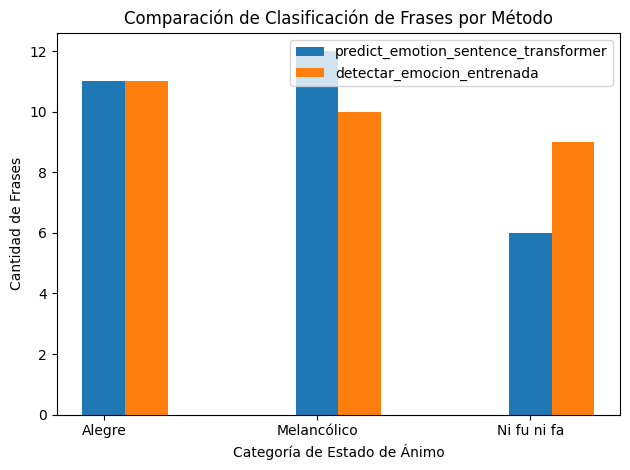

In [ ]:
data = pd.read_csv('data/dataset_emociones_sintetico.csv')
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')
clasificador = ClasificadorEmocion()
mlp_model, label_to_emocion = clasificador.detectar_emocion_entrenada(data, model, show_metrics=False)

frases_alegres = [
    "Estoy muy feliz hoy", "Este día es maravilloso", "Me siento genial", "Fue un buen día", "Todo salió perfecto",
    "Estoy emocionado por las vacaciones", "Disfruté mucho la comida", "El clima está perfecto", "Estoy contento", "Qué gran sorpresa"
]

frases_melancolicas = [
    "Me siento muy triste", "Hoy fue un mal día", "No tengo ganas de hacer nada", "Estoy enfadado", "Me siento decepcionado",
    "Tengo miedo", "Estoy muy molesto", "Nada salió bien", "Estoy preocupado", "Me siento frustrado"
]

frases_neutras = [
    "Es un día normal", "No pasó nada interesante", "Todo está bien", "Hoy fue un día tranquilo", "Estoy aquí",
    "Comí algo", "La tarde fue silenciosa", "No hubo sorpresas", "Fue un día cualquiera", "Nada fuera de lo común"
]

frases = frases_alegres + frases_melancolicas + frases_neutras

clasificacion = {}
clasificacion_st = {}
clasificacion_entrenada = {}

etiquetas_esperadas = {frase: 'Alegre' for frase in frases_alegres}
etiquetas_esperadas.update({frase: 'Melancólico' for frase in frases_melancolicas})
etiquetas_esperadas.update({frase: 'Ni fu ni fa' for frase in frases_neutras})

for frase in frases:
    clasificacion[frase] = clasificador.predict_emotion(frase)
    clasificacion_st[frase] = clasificador.predict_emotion_sentence_transformer(frase)
    embedding = clasificador.get_bert_embeddings(pd.Series([frase]), model)
    prediccion_entrenada = mlp_model.predict(embedding)[0]
    clasificacion_entrenada[frase] = label_to_emocion[prediccion_entrenada]

# Imprimir resultados
print("|" + "-" * 50 + "|")
print(" Clasificación de frases según su estado de ánimo (predict_emotion)")
for f, c in clasificacion.items():
    esperado = etiquetas_esperadas[f]
    print(f"  {f} --> Predicción: {c} | Esperado: {esperado}")
print("|" + "-" * 50 + "|")

print("\n|" + "-" * 50 + "|")
print(" Clasificación de frases según su estado de ánimo (predict_emotion_sentence_transformer)")
for f, c in clasificacion_st.items():
    esperado = etiquetas_esperadas[f]
    print(f"  {f} --> Predicción: {c} | Esperado: {esperado}")
print("|" + "-" * 50 + "|")

print("\n|" + "-" * 50 + "|")
print(" Clasificación de frases según su estado de ánimo (detectar_emocion_entrenada)")
for f, c in clasificacion_entrenada.items():
    esperado = etiquetas_esperadas[f]
    print(f"  {f} --> Predicción: {c} | Esperado: {esperado}")
print("|" + "-" * 50 + "|")

# Gráficas de comparación
labels = ['Alegre', 'Melancólico', 'Ni fu ni fa']

conteo_predict_emotion_st = [list(clasificacion_st.values()).count(label) for label in labels]
conteo_predict_emocion_entrenada = [list(clasificacion_entrenada.values()).count(label) for label in labels]

x = np.arange(len(labels))
width = 0.2

fig, ax = plt.subplots()
rects2 = ax.bar(x, conteo_predict_emotion_st, width, label='predict_emotion_sentence_transformer')
rects3 = ax.bar(x + width, conteo_predict_emocion_entrenada, width, label='detectar_emocion_entrenada')

ax.set_xlabel('Categoría de Estado de Ánimo')
ax.set_ylabel('Cantidad de Frases')
ax.set_title('Comparación de Clasificación de Frases por Método')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()
plt.show()

warnings.filterwarnings('ignore', category=FutureWarning)

**Nota:** Basado en los experimentos anteriores definimos que vamos usar el metodo predict_emotion_sentence_transformer que funciona mejor que el modelo de regresion logistica entrenado.

#### **Guardamos el modelo de regresión logistica**

In [ ]:
clasificador.guardar_modelo(mlp_model, "modelo_emocion_entrenado.pkl")

Modelo guardado en modelo_emocion_entrenado.pkl


### **Testing 🧪🧪**

In [ ]:
frases = ['Estoy muy feliz hoy', 'Fue un mal dia', 'Nada fuera de lo común']
modelo_cargado = clasificador.cargar_modelo("modelo_emocion_entrenado.pkl")
print("|" + "-" * 50 + "|")
print(" Predicción de emociones:\n")
for frase in frases:
    print("   ",frase ," --> ", clasificador.predecir_modelo_entrenado(modelo_cargado, frase, model))
print("|" + "-" * 50 + "|")

|--------------------------------------------------|
 Predicción de emociones:

    Estoy muy feliz hoy  -->  Alegre
    Fue un mal dia  -->  Melancólico
    Nada fuera de lo común  -->  Ni fu ni fa
|--------------------------------------------------|


### **📈 Progresos :**
1.   Librerias necesarias para la aplicacion ✅
2.   Web scraping para obtener dataset de libros ✅
3.   Datasets necesarios para la aplicación ✅
4.   Clasificador de estado de animo ✅
5.   Recomendaciones
6.   App



## **Recomendaciones** 📋📋

In [ ]:
import pandas as pd
import faiss
from sentence_transformers import SentenceTransformer
from transformers import pipeline
from mtranslate import translate
import numpy as np
import pickle
import os

###Creamos una lista con los 3 datasets

Donde cada elemento de la lista es una tupla con los siguientes elementos:
   - Ruta (str): path al archivo CSV del dataset.
   - Columnas (list of str): Nombres de las columnas a leer del archivo.
   - Columna de embeddings (str): Columna que contiene los textos a convertir en embeddings.
Fuente (str): Tipo de contenido representado en el dataset (por ejemplo, 'Película', 'Juego', 'Libro').



In [ ]:
datasets = [
  ('data/IMDB-Movie-Data.csv', ['Title', 'Description'], 'Description', 'Película'),
  ('data/bgg_database.csv', ['game_name', 'description'], 'description', 'Juego'),
  ('data/books.csv', ['Title', 'Summary'], 'Summary', 'Libro'),
]

In [ ]:
import os
import pickle
import faiss
import pandas as pd
import numpy as np
from sentence_transformers import SentenceTransformer
from transformers import pipeline

class RecomendadorActividades:
    """
    Clase para recomendar actividades o contenidos basados en una preferencia dada
    y un estado emocional detectado. Utiliza embeddings para procesar y buscar
    recomendaciones en conjuntos de datos de películas, juegos y libros.

    Atributos:
        - modelo (SentenceTransformer): Modelo de embeddings para convertir textos en vectores.
        - resumidor (pipeline): Pipeline de resumen de textos, utilizando un modelo de lenguaje preentrenado.
        - embeddings (np.array): Embeddings generados por SentenceTransformer.
        - index (faiss.IndexFlatL2): Índice FAISS para realizar búsquedas eficientes de similitud en los embeddings.
        - data (list): Lista de datos procesados de los datasets, almacenados como diccionarios.
    """

    def __init__(self, datasets, nombre_archivo='estado_recomendador.pkl'):
        """
        Inicializa una instancia de la clase configurando un modelo de embeddings,
        un modelo de resumen, y cargando e indexando los datasets proporcionados. En
        caso de que ya se haya ejecutado una vez el modelo, entonces el mismo se carga
        sin tener que generar todo el modelo desde cero.

        Args:
            - datasets (List of tuple): Lista con los 3 datasets definida en la celda anterior.
            - nombre_archivo (str): Nombre del archivo con el estado del modelo.
        """
        # Cargar el estado si el archivo existe
        if os.path.exists(nombre_archivo):
            self.cargar_estado(nombre_archivo)
            print("Estado cargado exitosamente.")
        else:
            self.modelo = SentenceTransformer('paraphrase-MiniLM-L6-v2')
            self.resumidor = pipeline("summarization", model="facebook/bart-large-cnn")
            self.embeddings = None
            self.index = None
            self.data = []
            self._cargar_e_indexar_datasets(datasets)
            print("Datos inicializados y embeddings generados.")

    def _cargar_e_indexar_datasets(self, datasets):
        """
        Carga cada dataset de la lista, genera embeddings y los agrega a un índice
        para facilitar la búsqueda.

        Args:
            - datasets (List of tuple): Lista con los 3 datasets definida en la celda anterior.

        Returns:
            None
        """
        embeddings = []
        for ruta, columnas, columna_embed, fuente in datasets:
            df = pd.read_csv(ruta, usecols=columnas)
            df['Fuente'] = fuente
            textos = df[columna_embed].fillna("").tolist()
            emb = self.modelo.encode(textos, convert_to_tensor=False)
            embeddings.extend(emb)
            self.data.extend(df.to_dict('records'))
        embeddings = np.array(embeddings, dtype='float32')
        self.embeddings = embeddings
        self._crear_indice(embeddings)

    def _crear_indice(self, embeddings):
        """
        Crea un índice de similitud utilizando FAISS para los embeddings generados.

        Args:
            - embeddings (np.ndarray): Matriz de embeddings.

        Returns:
            None
        """
        dimension = embeddings.shape[1]
        self.index = faiss.IndexFlatL2(dimension)
        self.index.add(embeddings)

    def recomendar(self, preferencia, emocion):
        """
        Genera 3 recomendaciones basadas en la preferencia y el estado emocional.

        Args:
            - preferencia (str): Texto que representa la preferencia del usuario.
                                Se usa para encontrar elementos similares en el índice.
            - emocion (str): Emoción detectada del usuario, utilizada para influir
                            en la búsqueda y presentación de las recomendaciones.

        Returns:
            - list of dict: Lista de 3 recomendaciones, donde cada recomendación es un
                            diccionario con la información formateada de acuerdo con
                            la emoción proporcionada.
        """
        # Procesar la preferencia y el estado emocional usando embeddings
        preferencia_emocion = f"{preferencia} {emocion}"
        preferencia_embed = self.modelo.encode([preferencia_emocion], convert_to_tensor=False)
        _, indices = self.index.search(np.array(preferencia_embed, dtype='float32'), 3)
        recomendaciones = [self._formatear_recomendacion(self.data[i], emocion) for i in indices[0]]

        return recomendaciones

    def _formatear_recomendacion(self, item, emocion):
        """
        Formatea una recomendación basada en el contenido del item y ajusta el mensaje según la emoción del usuario.

        Args:
            - item (dict): Diccionario que contiene los datos de la recomendación,
                        incluyendo su fuente, título y descripción.
            - emocion (str): Emoción detectada del usuario, que ajusta el tono
                            del mensaje de la recomendación.

        Returns:
            - str: Cadena de texto formateada con el título, resumen traducido y fuente,
                    ajustada según el estado emocional.
        """
        fuente = item['Fuente']
        titulo = item.get('Title', item.get('game_name', 'Sin título'))
        descripcion = item.get('description', item.get('Summary', 'Sin descripción'))
        resumen = self._resumir_y_traducir(descripcion)
        titulo = translate(titulo, "es")
        resumen = translate(resumen, "es")
        mensaje = f"{titulo} (Fuente: {fuente}) \n{resumen}"

        # Personalización según la emoción
        if emocion == 'Positivo':
            return f"¡Disfruta esto! {mensaje}"
        elif emocion == 'Negativo':
            return f"Esto podría animarte: {mensaje}"
        else:
            return f"Interesante opción: {mensaje}"

    def _resumir_y_traducir(self, texto):
        """
        Resume un texto largo y lo traduce al español; si el texto es corto,
        solo realiza la traducción.

        Args:
            - texto (str): Texto en inglés que se debe resumir (si es largo) y
                          luego traducir al español.
        Returns:
            - str: Texto en español, resumido si el texto original supera las 50 palabras.
        """
        if len(texto.split()) > 50:
            resumen = self.resumidor(texto, max_length=50, min_length=25, do_sample=False)[0]['summary_text']
            return resumen
        return texto

    def guardar_estado(self, nombre_archivo):
        # Guarda el índice FAISS
        faiss.write_index(self.index, 'indice_faiss.index')

        # Guarda los embeddings
        np.save('embeddings.npy', self.embeddings)

        # Guarda el modelo, el resumidor, y los datos
        with open(nombre_archivo, 'wb') as f:
            pickle.dump((self.modelo, self.resumidor, self.data), f)

    def cargar_estado(self, nombre_archivo):
        # Carga el índice FAISS
        self.index = faiss.read_index('indice_faiss.index')

        # Carga los embeddings
        self.embeddings = np.load('embeddings.npy')

        # Carga el modelo, el resumidor, y los datos
        with open(nombre_archivo, 'rb') as f:
            self.modelo, self.resumidor, self.data = pickle.load(f)

### **Ejecutamos el modelo** 🤖🧠

In [ ]:
recomendador = RecomendadorActividades(datasets)


config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


Datos inicializados y embeddings generados.


### **Testing 🧪🧪**

In [ ]:
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')
respuesta = input("Describe tu día en una frase: ")

modelo_cargado = clasificador.cargar_modelo("modelo_emocion_entrenado.pkl")
emocion_detectada = clasificador.predecir_modelo_entrenado(modelo_cargado, respuesta, model)

"""embedding = clasificador.get_bert_embeddings(pd.Series([respuesta]), model)
label_to_emocion = clasificador.detectar_emocion_entrenada(data, model)[1]  # Obtén el mapeo de etiquetas
emocion_detectada = clasificador.detectar_emocion_entrenada(data, model)[0].predict(embedding)[0]"""

preferencia = input("¿Qué temática te gustaría explorar? ")
recomendaciones = recomendador.recomendar(preferencia, emocion_detectada)

print(f"Estado emocional detectado: {emocion_detectada}")
print("Recomendaciones:")
print("\n" + "-" * 40)
for rec in recomendaciones:
    print(rec)
    print("-" * 40)

KeyboardInterrupt: Interrupted by user

En el contexto de la clase RecomendadorActividades, el uso de NER (modelo Gliner) no es necesario porque los embeddings de SentenceTransformer ya capturan de manera integral el contexto y la semántica del texto. Estos embeddings permiten comparar la similitud semántica entre las preferencias del usuario y el contenido, proporcionando una representación global y rica del significado del texto.

Nuestro enfoque basado en embeddings es mejor que el uso de NER en este caso porque los embeddings no solo identifican palabras clave, sino que también capturan relaciones complejas y matices semánticos que son esenciales para recomendaciones precisas. Mientras que NER se enfoca únicamente en extraer entidades específicas (nombres, lugares, etc.), los embeddings permiten una comparación más profunda y contextual del significado de los textos completos, lo cual es crucial para encontrar recomendaciones relevantes y alineadas con las preferencias del usuario. Además, el uso de NER agregaría una capa de complejidad y procesamiento adicional que no aporta un valor proporcional al costo computacional, ya que no mejora la calidad de la similitud semántica.

### **📈 Progresos :**
1.   Librerias necesarias para la aplicacion ✅
2.   Web scraping para obtener dataset de libros ✅
3.   Datasets necesarios para la aplicación ✅
4.   Clasificador de estado de animo ✅
5.   Recomendaciones ✅
6.   App

## **App** 📱📱

In [ ]:
import ipywidgets as widgets
from IPython.display import display, clear_output, HTML

recomendador = RecomendadorActividades(datasets)
modelo_cargado = clasificador.cargar_modelo("modelo_emocion_entrenado.pkl")
def custom_html_style():
    return """
    <style>
        .widget-label {
            font-weight: bold;
            color: #4a4a4a;
        }
        .widget-button-primary {
            background-color: #007bff;
            color: white;
            border-radius: 8px;
            border: none;
        }
        .widget-button-primary:hover {
            background-color: #0056b3;
        }
        .widget-button-success {
            background-color: #28a745;
            color: white;
            border-radius: 8px;
            border: none;
        }
        .widget-button-success:hover {
            background-color: #1e7e34;
        }
        .output {
            background-color: #f9f9f9;
            border: 1px solid #ddd;
            padding: 10px;
            border-radius: 10px;
            margin-top: 10px;
        }
    </style>
    """

# Agregar el estilo personalizado al notebook
display(HTML(custom_html_style()))

frase_animo = widgets.Text(
    value='',
    placeholder='Describe tu día en una frase...',
    description='Estado de Ánimo:',
    layout=widgets.Layout(width='80%'),
    style={'description_width': 'initial'},
    disabled=False
)

boton_animo = widgets.Button(
    description='Detectar Ánimo',
    button_style='primary',
    layout=widgets.Layout(width='30%'),
    style={'button_color': '#007bff'}
)

output_animo = widgets.Output(layout={'border': '1px solid #ddd', 'padding': '10px', 'margin-top': '10px'})

frase_preferencia = widgets.Text(
    value='',
    placeholder='¿Qué temática te gustaría explorar?',
    description='Preferencia:',
    layout=widgets.Layout(width='80%'),
    style={'description_width': 'initial'},
    disabled=True
)

boton_recomendar = widgets.Button(
    description='Recomendar',
    button_style='success',
    layout=widgets.Layout(width='30%'),
    style={'button_color': '#28a745'},
    disabled=True
)

output_recomendaciones = widgets.Output(layout={'border': '1px solid #ddd', 'padding': '10px', 'margin-top': '10px'})

emocion_detectada = None

def detectar_animo_callback(b):
    global emocion_detectada
    clear_output(wait=True)
    with output_animo:
        frase = frase_animo.value.strip()
        if frase:

            """embedding = emotion.get_bert_embeddings(pd.Series([frase]), model)
            emocion_detectada = emotion.detectar_emocion_entrenada(data, model)[0].predict(embedding)[0]
            label_to_emocion = clasificador.detectar_emocion_entrenada(data, model)[1]  # Obtén el mapeo de etiquetas

            #resultado = emotion.predict_emotion_sentence_transformer(frase)
            print(f"Emoción detectada: {label_to_emocion[emocion_detectada]}")"""
            emocion_detectada = clasificador.predecir_modelo_entrenado(modelo_cargado, frase, model)
            print(f"Emoción detectada: {emocion_detectada}")
            frase_preferencia.disabled = False
            boton_recomendar.disabled = False
        else:
            print("Por favor, ingresa una frase válida.")

def recomendar_callback(b):
    clear_output(wait=True)
    with output_recomendaciones:
        preferencia = frase_preferencia.value.strip()
        if preferencia:
            recomendaciones = recomendador.recomendar(preferencia, emocion_detectada)

            print(f"Emoción: {emocion_detectada}")
            print(f"Preferencia: {preferencia}")
            print("\nRecomendaciones:")
            if recomendaciones:
                for rec in recomendaciones:
                    print(f"- {rec}")
            else:
                print("No se encontraron recomendaciones.")
        else:
            print("Por favor, ingresa una preferencia válida.")

boton_animo.on_click(detectar_animo_callback)
boton_recomendar.on_click(recomendar_callback)

display(
    widgets.VBox([
        widgets.HBox([frase_animo, boton_animo]),
        output_animo,
        widgets.HBox([frase_preferencia, boton_recomendar]),
        output_recomendaciones
    ], layout=widgets.Layout(align_items='center', padding='20px'))
)

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


Datos inicializados y embeddings generados.


### **📈 Progresos :**
1.   Librerias necesarias para la aplicacion ✅
2.   Web scraping para obtener dataset de libros ✅
3.   Datasets necesarios para la aplicación ✅
4.   Clasificador de estado de animo ✅
5.   Recomendaciones ✅
6.   App ✅